#  Importing necessary libraries

In [79]:
!pip install nltk
#nltk.download('stopwords')

In [80]:
import numpy as np # scientific computation
import pandas as pd # loading dataset file
import matplotlib.pyplot as plt # Visulization
import nltk  # Preprocessing our text
from nltk.corpus import stopwords # removing all the stop words
from nltk.stem.porter import PorterStemmer # stemming of words

# Load our dataset


In [81]:
pwd

'/home/wsuser/work'

In [41]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f5a80e161bb046eb8042b2798b51b4ed = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='F92DhhjNqLr3n_rqmbuAvbZtKS8LiItVERcTBR6q45Oe',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_f5a80e161bb046eb8042b2798b51b4ed.get_object(Bucket='smsspamclassification-donotdelete-pr-t1m1lofwmuaau2',Key='spam_ham_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0

In [82]:
df_data_2 = df_data_2.head(1000)

# EDA on Dataset

In [83]:
# Return the shape of data 
df_data_2.shape

(1000, 4)

In [84]:
# Return the n dimensions of data
df_data_2.ndim

2

In [85]:
# Return the size of data 
df_data_2.size

4000

In [86]:
#Returns the sum fo all na values
df_data_1.isna().sum() 

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [87]:
#Give concise summary of a DataFrame
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5 non-null      int64 
 1   label       5 non-null      object
 2   text        5 non-null      object
 3   label_num   5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


In [88]:
# top 5 rows of the dataframe
df_data_2.head() 

Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0

In [89]:
# bottom 5 rows of the dataframe
df_data_2.tail()

Unnamed: 0 label                                               text  \
995         794   ham  Subject: meter 9794\r\ndaren - during the saxe...   
996         376   ham  Subject: cp name change / merger list for 2 / ...   
997        1799   ham  Subject: eastrans nomination change effective ...   
998         706   ham  Subject: popsprd migration\r\nthe popsprd brid...   
999        4446  spam  Subject: vicodin for you . cheap .\r\nyou need...   

     label_num  
995          0  
996          0  
997          0  
998          0  
999          1

# Let’s Visualize the Column label_num

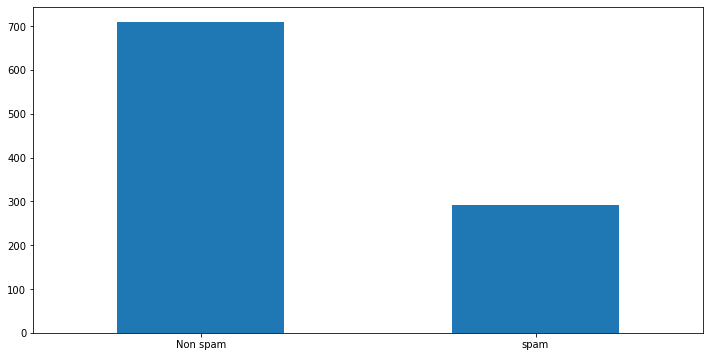

In [90]:
df_data_2["label_num"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0);

# Cleaning The Text

In [91]:
import re
corpus = []
length = len(df_data_2)


In [92]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/wsuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
for i in range(0,1000):
    text = re.sub("[^a-zA-Z0-9]"," ",df_data_2["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)


In [94]:
corpus

['subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos',
 'subject hpl nom januari 9 2001 see attach file hplnol 09 xl hplnol 09 xl',
 'subject neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb 25 januari 1 like think minut calend hand begin fall semest retreat schedul weekend januari 5 6 youth minist confer brad dustin connect week go chang date follow weekend januari 12 13 come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place 13 bedroom 5 bedroom hous

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3500)
X = cv.fit_transform(corpus).toarray()

In [96]:
# Extracting dependent variable from the dataset
y = pd.get_dummies(df_data_2['label'])
y = y.iloc[:, 1].values

In [97]:
import pickle ## importing pickle used for dumping models
pickle.dump(cv, open('cv.pkl', 'wb')) ## saving to into cv.pkl file

# Modeling and Training

In [98]:
#Splitting data into train and validation sets using train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

##train size 80% and test size 20%

# Creating a model using Multinomial NaiveBayes

In [99]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [100]:
#Fitting the model to the training sets
model.fit(X_train, y_train)

MultinomialNB()

# Prediction


In [101]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0], dtype=uint8)

# Evaluating Model

In [102]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('Accuracy Score Is:- ' ,score*100)

[[133   8]
 [  2  57]]
Accuracy Score Is:-  95.0


In [103]:
import pickle
pickle.dump(model, open("spam.pkl", "wb"))

In [104]:
ls -1


cv.pkl
spam1.tgz
spam.pkl
spam.tgz


In [105]:
a="spam.pkl"

In [106]:
!tar -zcvf spam.tgz spam.pkl

spam.pkl


In [68]:
ls-1

cv.pkl
spam.pkl
spam.tgz


In [107]:
b="cv.pkl"

In [108]:
!tar -zcvf spam1.tgz cv.pkl

cv.pkl


In [109]:
ls-1

cv.pkl
spam1.tgz
spam.pkl
spam.tgz


# Machine Learning via watson studio

In [110]:
import ibm_watson_machine_learning

In [111]:
from ibm_watson_machine_learning import APIClient
import json

# Authenticationg and setting space

In [112]:
wml_credentials = {
    "apikey":"d78zoV_w8aI8CuH6ljbG8Ex9kUilGi7be_7rlh0qO0S0",
    "url" : "https://us-south.ml.cloud.ibm.com"
}

In [113]:
#checking for available space list

wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
--  ----  -------
ID  NAME  CREATED
--  ----  -------


In [117]:
space_id="5d0e709a-c37e-401f-b516-b30ded4ef19f"
print(space_id)

5d0e709a-c37e-401f-b516-b30ded4ef19f


In [118]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [132]:
wml_client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

# Saving and deploying the model

In [143]:
# setting python version

software_spec_uid = wml_client.software_specifications.get_id_by_name("runtime-22.1-py3.9")
software_spec_uid


'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [145]:
model_details = wml_client.repository.store_model(model='spam.tgz',
                                              meta_props= {
                                                  wml_client.repository.ModelMetaNames.NAME:"NLP",
                                                  wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
                                                  wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                              }) 
model_id = wml_client.repository.get_model_id(model_details)

In [146]:
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [147]:
model_id = wml_client.repository.get_model_id(model_details)

In [149]:
model_id

'dd189b74-b28c-471c-861f-f024894e0941'

In [ ]:
wml_client.repository.download(model_id , "sms_spam_model.tar.gz")

# CV Model Deploy

In [157]:
model_details1 = wml_client.repository.store_model(model='spam1.tgz',
                                              meta_props= {
                                                  wml_client.repository.ModelMetaNames.NAME:"NLP",
                                                  wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
                                                  wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                              }) 
model_id1 = wml_client.repository.get_model_id(model_details1)

In [156]:
model_id1 = wml_client.repository.get_model_id(model_details1)

In [155]:
model_id1

'2877b505-6c24-499f-ad84-4beb7aa8a8ea'

In [154]:
ls -1

cv.pkl
spam1.tgz
spam.pkl
spam.tgz
